# Reduce out-of-service energy:

* Which equipment/trains have an "anomalous" consumption?


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Load the dataset
df = pd.read_csv('data/clean_clean_energy.csv')

In [3]:
columns_to_analyze = [
    'net_energy_consumed_by_UT',
    'auxiliary_energy_consumed',
    'traction_energy',
    'rheostatic_energy',
    'regenerated_traction_energy',
    'catenary_regenerated_energy'
]

# Calculate statistics
stats = df[columns_to_analyze].agg(['mean', 'median', 'min', 'max', 'std'])

stats

,net_energy_consumed_by_UT,auxiliary_energy_consumed,traction_energy,rheostatic_energy,regenerated_traction_energy,catenary_regenerated_energy
mean,9.508561,1.584750,11.251751,-2.105493,3.327770,-2.867912
median,7.349692,1.159004,9.373426,-1.421633,2.672174,-2.263581
min,-16.285639,0.000000,0.000000,-29.151200,0.000000,-84.972884
max,190.129783,155.477316,241.144169,0.000000,98.495212,0.000000
std,9.136314,1.532870,8.691471,2.239477,2.782757,2.508964


### Going through outliers to identify which ones are most frequent while increasing the number of standard deviations

5 standard deviations away from the mean

In [4]:
def detect_outliers(data, cols):
    outlier_indices = []
    for col in cols:
        # Calculate mean and standard deviation
        mean = data[col].mean()
        std = data[col].std()

        # Define the cutoff for outliers (5 standard deviations from the mean)
        cutoff = std * 5

        # Lower and upper limits
        lower, upper = mean - cutoff, mean + cutoff

        # Find outliers
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        outlier_indices.extend(outliers.index)

    # Use a list to index the DataFrame
    return data.loc[list(set(outlier_indices))]

# Get outliers
outliers = detect_outliers(df, columns_to_analyze)

outliers

# Calculate frequencies of each 'ut' in the outliers
ut_frequencies = outliers['ut'].value_counts()

ut_frequencies

ut
929    3121
925    2948
930    2819
922    2757
924    2664
928    2649
927    2637
923    2043
926    1961
921    1743
903     455
916     405
904     388
901     318
915     318
918     289
920     283
917     279
919     234
909     179
912     175
913     157
914     152
911     150
910     135
907     133
906     123
902     121
905     118
908     117
Name: count, dtype: int64

6 standard deviations away from the mean

In [5]:
def detect_outliers(data, cols):
    outlier_indices = []
    for col in cols:
        # Calculate mean and standard deviation
        mean = data[col].mean()
        std = data[col].std()

        # Define the cutoff for outliers (6 standard deviations from the mean)
        cutoff = std * 6

        # Lower and upper limits
        lower, upper = mean - cutoff, mean + cutoff

        # Find outliers
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        outlier_indices.extend(outliers.index)

    # Use a list to index the DataFrame
    return data.loc[list(set(outlier_indices))]

# Get outliers
outliers = detect_outliers(df, columns_to_analyze)

outliers

# Calculate frequencies of each 'ut' in the outliers
ut_frequencies = outliers['ut'].value_counts()

ut_frequencies

ut
929    1418
925    1339
930    1317
928    1250
922    1204
927    1196
924    1173
926     804
923     804
921     651
903     245
904     191
901     171
915     167
916     156
917     108
920     100
918      89
909      82
919      73
913      62
912      60
914      60
907      54
911      53
902      52
910      51
905      49
906      49
908      44
Name: count, dtype: int64

7 standard deviations away from the mean

In [6]:
def detect_outliers(data, cols):
    outlier_indices = []
    for col in cols:
        # Calculate mean and standard deviation
        mean = data[col].mean()
        std = data[col].std()

        # Define the cutoff for outliers (7 standard deviations from the mean)
        cutoff = std * 7

        # Lower and upper limits
        lower, upper = mean - cutoff, mean + cutoff

        # Find outliers
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        outlier_indices.extend(outliers.index)

    # Use a list to index the DataFrame
    return data.loc[list(set(outlier_indices))]

# Get outliers
outliers = detect_outliers(df, columns_to_analyze)

outliers

# Calculate frequencies of each 'ut' in the outliers
ut_frequencies = outliers['ut'].value_counts()

ut_frequencies

ut
929    645
925    622
930    605
928    598
927    548
924    523
922    477
923    384
926    336
921    272
903    157
904    106
901    105
915    100
916     68
917     50
920     49
909     38
913     34
911     33
918     33
912     32
914     30
910     29
906     28
902     27
919     21
908     21
905     19
907     19
Name: count, dtype: int64

8 standard deviations away from the mean

In [7]:
def detect_outliers(data, cols):
    outlier_indices = []
    for col in cols:
        # Calculate mean and standard deviation
        mean = data[col].mean()
        std = data[col].std()

        # Define the cutoff for outliers (8 standard deviations from the mean)
        cutoff = std * 8

        # Lower and upper limits
        lower, upper = mean - cutoff, mean + cutoff

        # Find outliers
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        outlier_indices.extend(outliers.index)

    # Use a list to index the DataFrame
    return data.loc[list(set(outlier_indices))]

# Get outliers
outliers = detect_outliers(df, columns_to_analyze)

outliers

# Calculate frequencies of each 'ut' in the outliers
ut_frequencies = outliers['ut'].value_counts()

ut_frequencies

ut
925    293
928    287
929    275
930    247
927    241
924    220
922    185
923    169
926    146
921    121
903    106
901     64
915     62
904     56
917     41
916     39
920     31
912     24
918     23
911     23
914     20
913     17
902     15
909     15
906     15
910     13
919     13
907     13
908     12
905     11
Name: count, dtype: int64

### Start of data visuliazation, identify anything about average and building a range of UT that we need to consider

Minimum Voltage: 0.0
Maximum Voltage: 1901.820762711865
Average Voltage: 1728.5929692583413


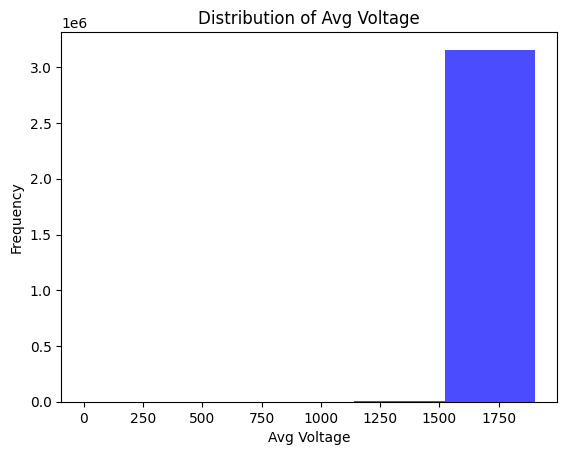


Standardized Voltage:
0          1.161590
1          2.435203
2          0.031031
3          1.190467
4          0.970341
             ...   
3160707    0.809028
3160708    0.415530
3160709   -0.663816
3160710   -0.648541
3160711   -0.718723
Name: standardized_voltage, Length: 3160712, dtype: float64


In [8]:
# Calculate minimum, maximum, and average
min_voltage = df['avg_voltage'].min()
max_voltage = df['avg_voltage'].max()
avg_voltage = df['avg_voltage'].mean()

print("Minimum Voltage:", min_voltage)
print("Maximum Voltage:", max_voltage)
print("Average Voltage:", avg_voltage)

# Plotting the distribution of 'avg_voltage'
plt.hist(df['avg_voltage'], bins=5, color='blue', alpha=0.7)
plt.title('Distribution of Avg Voltage')
plt.xlabel('Avg Voltage')
plt.ylabel('Frequency')
plt.show()

# Standardizing the 'avg_voltage' column
df['standardized_voltage'] = zscore(df['avg_voltage'])

# Output the standardized values
print("\nStandardized Voltage:")
print(df['standardized_voltage'])


In [9]:
# Grouping by 'ut' and applying sum and mean to 'avg_voltage'
grouped_data = df.groupby('ut')['avg_voltage'].agg(['sum', 'mean']).reset_index()

# Rename columns for clarity
grouped_data.columns = ['ut', 'Total Avg Voltage', 'Average of Avg Voltage']

# Sorting by 'Average of Avg Voltage' in descending order
sorted_data = grouped_data.sort_values(by='Average of Avg Voltage', ascending=False)

# Display the result
print(sorted_data)

     ut  Total Avg Voltage  Average of Avg Voltage
23  924       1.806073e+08             1734.173956
28  929       2.041207e+08             1733.435248
26  927       1.808232e+08             1733.251277
29  930       2.055460e+08             1732.182390
24  925       1.835331e+08             1732.130317
27  928       1.894177e+08             1731.502168
0   901       1.575287e+08             1731.408582
2   903       1.431617e+08             1730.343206
20  921       1.877363e+08             1730.192744
14  915       1.626470e+08             1729.643044
22  923       2.037708e+08             1729.627211
3   904       1.563614e+08             1729.604295
9   910       1.837986e+08             1729.543311
5   906       1.861321e+08             1728.920429
8   909       1.889286e+08             1728.516988
11  912       1.952534e+08             1728.395817
4   905       1.987980e+08             1727.956910
6   907       1.924711e+08             1727.794460
12  913       1.731692e+08     

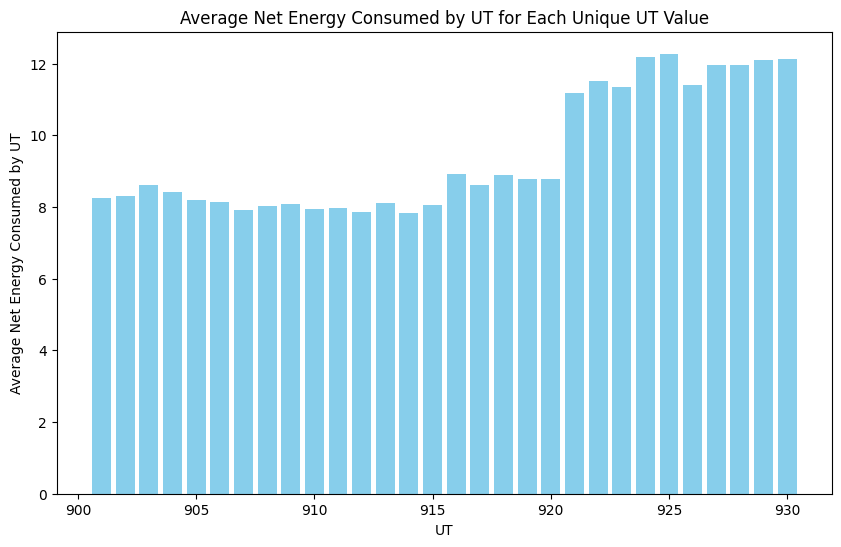

In [10]:
# Grouping by 'ut' and calculating the average of 'net_energy_consumed_by_UT'
average_energy = df.groupby('ut')['net_energy_consumed_by_UT'].mean().reset_index()

# Sorting the data for better visualization (optional)
average_energy.sort_values(by='net_energy_consumed_by_UT', inplace=True)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(average_energy['ut'], average_energy['net_energy_consumed_by_UT'], color='skyblue')
plt.xlabel('UT')
plt.ylabel('Average Net Energy Consumed by UT')
plt.title('Average Net Energy Consumed by UT for Each Unique UT Value')
plt.show()

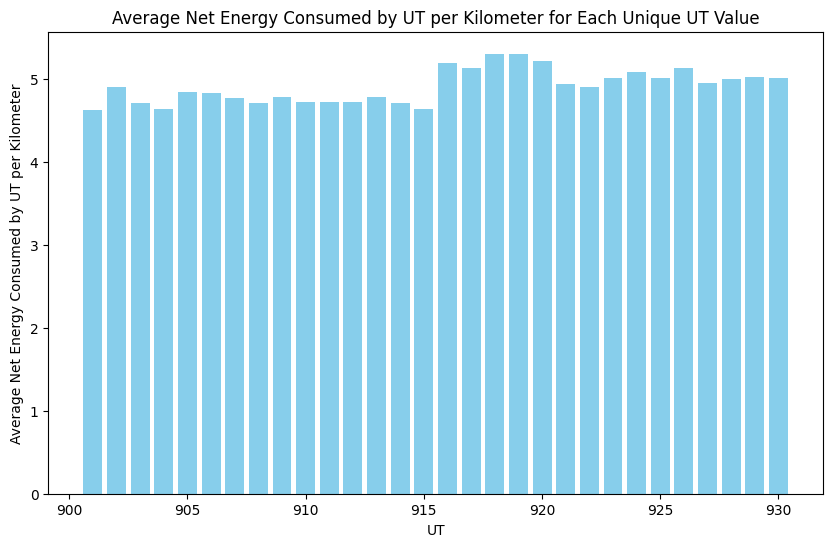

In [11]:
# Calculate total energy and total kilometers for each 'ut'
grouped = df.groupby('ut').agg({
    'net_energy_consumed_by_UT': 'sum',  # Sum of energy for each UT
    'kilometres': 'sum'  # Sum of kilometers for each UT
})

# Calculate average energy consumed per kilometer
grouped['avg_energy_per_km'] = grouped['net_energy_consumed_by_UT'] / grouped['kilometres']

# Sorting the data for better visualization (optional)
grouped.sort_values(by='avg_energy_per_km', inplace=True)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['avg_energy_per_km'], color='skyblue')
plt.xlabel('UT')
plt.ylabel('Average Net Energy Consumed by UT per Kilometer')
plt.title('Average Net Energy Consumed by UT per Kilometer for Each Unique UT Value')
plt.show()


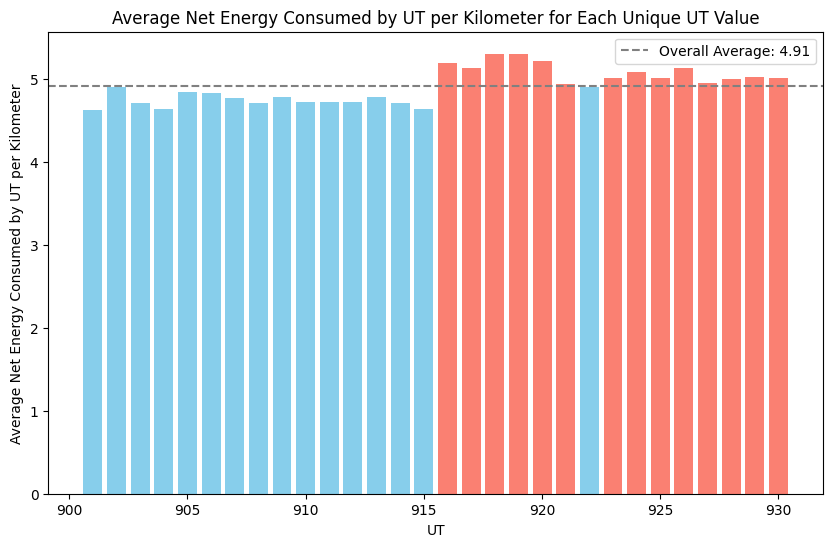

In [12]:
# Calculate total energy and total kilometers for each 'ut'
grouped = df.groupby('ut').agg({
    'net_energy_consumed_by_UT': 'sum',  # Sum of energy for each UT
    'kilometres': 'sum'  # Sum of kilometers for each UT
})

# Calculate average energy consumed per kilometer
grouped['avg_energy_per_km'] = grouped['net_energy_consumed_by_UT'] / grouped['kilometres']

# Calculate the overall average
overall_avg = grouped['avg_energy_per_km'].mean()

# Sorting the data for better visualization
grouped.sort_values(by='avg_energy_per_km', inplace=True)

# Color bars differently based on whether they are above or below the average
colors = ['skyblue' if x < overall_avg else 'salmon' for x in grouped['avg_energy_per_km']]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['avg_energy_per_km'], color=colors)
plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
plt.xlabel('UT')
plt.ylabel('Average Net Energy Consumed by UT per Kilometer')
plt.title('Average Net Energy Consumed by UT per Kilometer for Each Unique UT Value')
plt.legend()
plt.show()


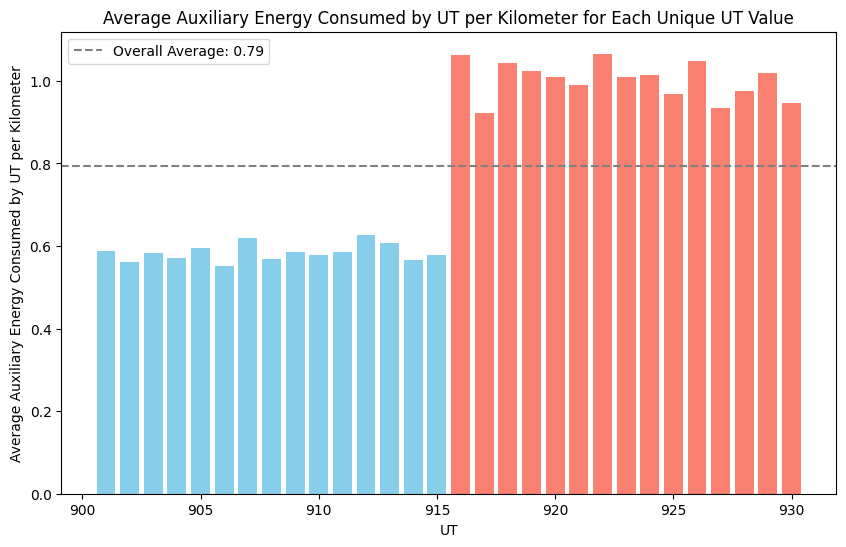

In [13]:
# Calculate total auxiliary energy and total kilometers for each 'ut'
grouped = df.groupby('ut').agg({
    'auxiliary_energy_consumed': 'sum',  # Sum of auxiliary energy for each UT
    'kilometres': 'sum'  # Sum of kilometers for each UT
})

# Calculate average auxiliary energy consumed per kilometer
grouped['avg_aux_energy_per_km'] = grouped['auxiliary_energy_consumed'] / grouped['kilometres']

# Calculate the overall average
overall_avg = grouped['avg_aux_energy_per_km'].mean()

# Sorting the data for better visualization
grouped.sort_values(by='avg_aux_energy_per_km', inplace=True)

# Color bars differently based on whether they are above or below the average
colors = ['skyblue' if x < overall_avg else 'salmon' for x in grouped['avg_aux_energy_per_km']]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['avg_aux_energy_per_km'], color=colors)
plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
plt.xlabel('UT')
plt.ylabel('Average Auxiliary Energy Consumed by UT per Kilometer')
plt.title('Average Auxiliary Energy Consumed by UT per Kilometer for Each Unique UT Value')
plt.legend()
plt.show()
    

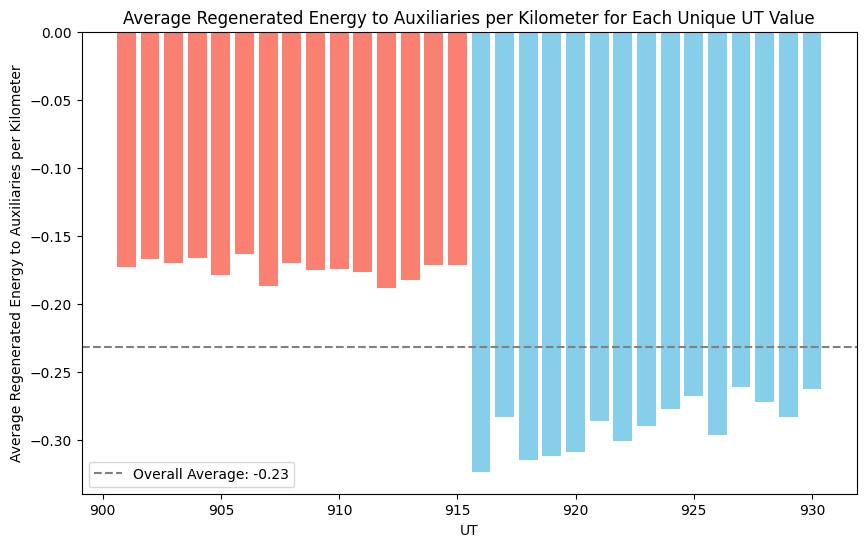

In [14]:
# Calculate total regenerated energy to auxiliaries and total kilometers for each 'ut'
grouped = df.groupby('ut').agg({
    'regenerated_energy_to_auxiliaries': 'sum',  # Sum of regenerated energy for each UT
    'kilometres': 'sum'  # Sum of kilometers for each UT
})

# Calculate average regenerated energy to auxiliaries consumed per kilometer
grouped['avg_regenerated_aux_energy_per_km'] = grouped['regenerated_energy_to_auxiliaries'] / grouped['kilometres']

# Calculate the overall average
overall_avg = grouped['avg_regenerated_aux_energy_per_km'].mean()

# Sorting the data for better visualization
grouped.sort_values(by='avg_regenerated_aux_energy_per_km', inplace=True)

# Color bars differently based on whether they are above or below the average
colors = ['skyblue' if x < overall_avg else 'salmon' for x in grouped['avg_regenerated_aux_energy_per_km']]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['avg_regenerated_aux_energy_per_km'], color=colors)
plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
plt.xlabel('UT')
plt.ylabel('Average Regenerated Energy to Auxiliaries per Kilometer')
plt.title('Average Regenerated Energy to Auxiliaries per Kilometer for Each Unique UT Value')
plt.legend()
plt.show()


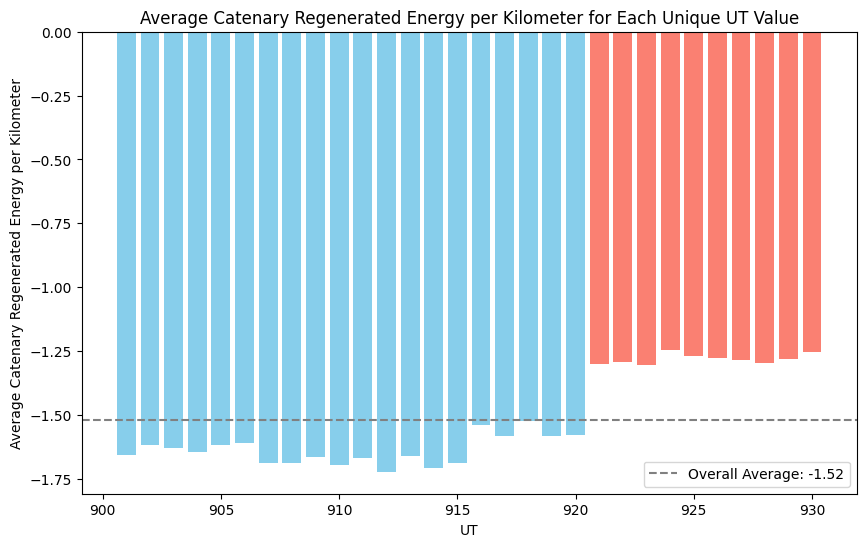

In [15]:
# Calculate total catenary regenerated energy and total kilometers for each 'ut'
grouped = df.groupby('ut').agg({
    'catenary_regenerated_energy': 'sum',  # Sum of catenary regenerated energy for each UT
    'kilometres': 'sum'  # Sum of kilometers for each UT
})

# Calculate average catenary regenerated energy per kilometer
grouped['avg_catenary_regenerated_energy_per_km'] = grouped['catenary_regenerated_energy'] / grouped['kilometres']

# Calculate the overall average
overall_avg = grouped['avg_catenary_regenerated_energy_per_km'].mean()

# Sorting the data for better visualization
grouped.sort_values(by='avg_catenary_regenerated_energy_per_km', inplace=True)

# Color bars differently based on whether they are above or below the average
colors = ['skyblue' if x < overall_avg else 'salmon' for x in grouped['avg_catenary_regenerated_energy_per_km']]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['avg_catenary_regenerated_energy_per_km'], color=colors)
plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
plt.xlabel('UT')
plt.ylabel('Average Catenary Regenerated Energy per Kilometer')
plt.title('Average Catenary Regenerated Energy per Kilometer for Each Unique UT Value')
plt.legend()
plt.show()


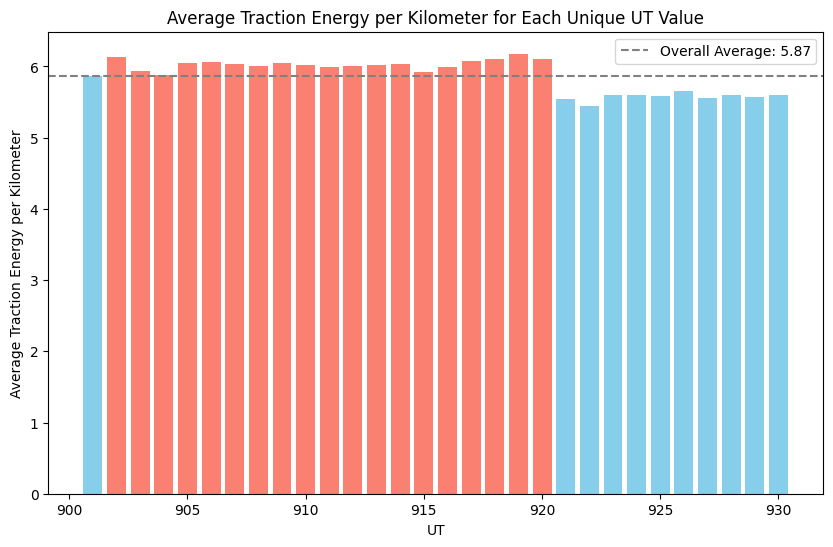

In [16]:
# Calculate total traction energy and total kilometers for each 'ut'
grouped = df.groupby('ut').agg({
    'traction_energy': 'sum',  # Sum of traction energy for each UT
    'kilometres': 'sum'  # Sum of kilometers for each UT
})

# Calculate average traction energy consumed per kilometer
grouped['avg_traction_energy_per_km'] = grouped['traction_energy'] / grouped['kilometres']

# Calculate the overall average
overall_avg = grouped['avg_traction_energy_per_km'].mean()

# Sorting the data for better visualization
grouped.sort_values(by='avg_traction_energy_per_km', inplace=True)

# Color bars differently based on whether they are above or below the average
colors = ['skyblue' if x < overall_avg else 'salmon' for x in grouped['avg_traction_energy_per_km']]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['avg_traction_energy_per_km'], color=colors)
plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
plt.xlabel('UT')
plt.ylabel('Average Traction Energy per Kilometer')
plt.title('Average Traction Energy per Kilometer for Each Unique UT Value')
plt.legend()
plt.show()


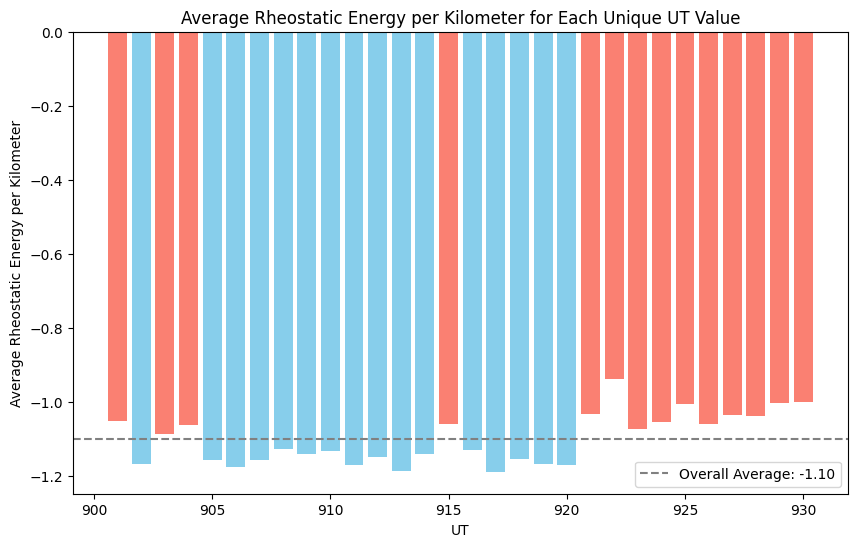

In [17]:
# Calculate total rheostatic energy and total kilometers for each 'ut'
grouped = df.groupby('ut').agg({
    'rheostatic_energy': 'sum',  # Sum of rheostatic energy for each UT
    'kilometres': 'sum'  # Sum of kilometers for each UT
})

# Calculate average rheostatic energy consumed per kilometer
grouped['avg_rheostatic_energy_per_km'] = grouped['rheostatic_energy'] / grouped['kilometres']

# Calculate the overall average
overall_avg = grouped['avg_rheostatic_energy_per_km'].mean()

# Sorting the data for better visualization
grouped.sort_values(by='avg_rheostatic_energy_per_km', inplace=True)

# Color bars differently based on whether they are above or below the average
colors = ['skyblue' if x < overall_avg else 'salmon' for x in grouped['avg_rheostatic_energy_per_km']]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['avg_rheostatic_energy_per_km'], color=colors)
plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
plt.xlabel('UT')
plt.ylabel('Average Rheostatic Energy per Kilometer')
plt.title('Average Rheostatic Energy per Kilometer for Each Unique UT Value')
plt.legend()
plt.show()


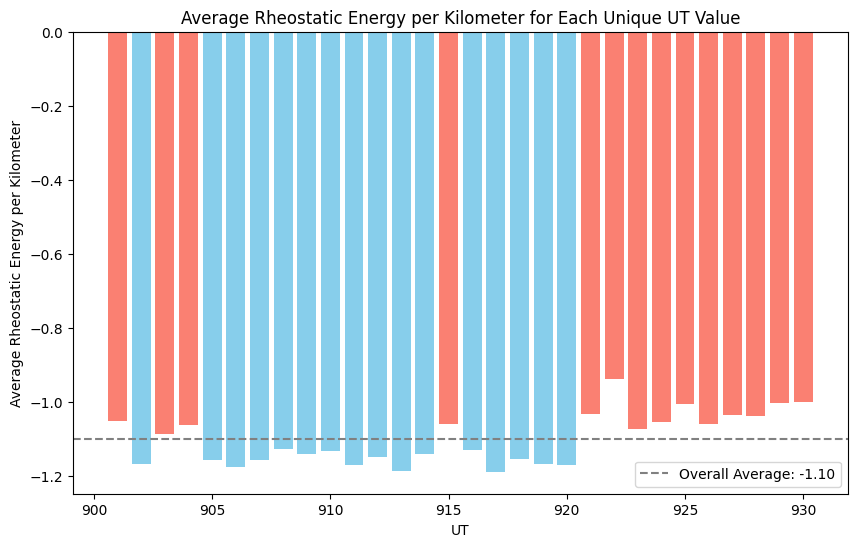

In [18]:
# Calculate total rheostatic energy and total kilometers for each 'ut'
grouped = df.groupby('ut').agg({
    'rheostatic_energy': 'sum',  # Sum of rheostatic energy for each UT
    'kilometres': 'sum'  # Sum of kilometers for each UT
})

# Calculate average rheostatic energy consumed per kilometer
grouped['avg_rheostatic_energy_per_km'] = grouped['rheostatic_energy'] / grouped['kilometres']

# Calculate the overall average
overall_avg = grouped['avg_rheostatic_energy_per_km'].mean()

# Sorting the data for better visualization
grouped.sort_values(by='avg_rheostatic_energy_per_km', inplace=True)

# Color bars differently based on whether they are above or below the average
colors = ['skyblue' if x < overall_avg else 'salmon' for x in grouped['avg_rheostatic_energy_per_km']]

# Plotting the initial results
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['avg_rheostatic_energy_per_km'], color=colors)
plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
plt.xlabel('UT')
plt.ylabel('Average Rheostatic Energy per Kilometer')
plt.title('Average Rheostatic Energy per Kilometer for Each Unique UT Value')
plt.legend()
plt.show()

After this analysis we conculded that the anomalous trains are: 930, 929, 925, 928, 927, 924, 922.
To further back this up, we used the isolation forest algorithm to identify more outliers.